<a href="https://colab.research.google.com/github/dclark18/MSDS7333---Quantifying-the-World/blob/master/Unit%202%20Case%20study/Code/MSDS_WEEK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#txt = readLines("offline.final.trace.txt")

offlinetxt = readLines("http://rdatasciencecases.org/Data/offline.final.trace.txt")
onlinetxt = readLines("http://rdatasciencecases.org/Data/online.final.trace.txt")

In [2]:
sum(substr(offlinetxt, 1, 1) == "#")

[1] 5312

In [3]:
length(offlinetxt)

[1] 151392

In [4]:
sum(substr(onlinetxt, 1, 1) == "#")

[1] 240

In [5]:
length(onlinetxt)

[1] 6832

#### Cleaning Offline Data

In [0]:
processLine = function(x)
{
tokens = strsplit(x, "[;=,]")[[1]]
if (length(tokens) == 10)
    return(NULL)
tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6,
byrow = TRUE), tmp)
}

In [7]:
offlineclean = strsplit(offlinetxt[4], "[;=,]")[[1]]
offlineclean[1:10]

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"

Extract the First Four Variables

In [8]:
offlineclean[c(2, 4, 6:8, 10)]

[1] "1139643118358"     "00:02:2D:21:0F:33" "0.0"              
[4] "0.0"               "0.0"               "0.0"

strip the first 4 elements

In [9]:
offlineclean[ - (1:10)]

[1] "00:14:bf:b1:97:8a" "-38"               "2437000000"       
 [4] "3"                 "00:14:bf:b1:97:90" "-56"              
 [7] "2427000000"        "3"                 "00:0f:a3:39:e1:c0"
[10] "-53"               "2462000000"        "3"                
[13] "00:14:bf:b1:97:8d" "-65"               "2442000000"       
[16] "3"                 "00:14:bf:b1:97:81" "-65"              
[19] "2422000000"        "3"                 "00:14:bf:3b:c7:c6"
[22] "-66"               "2432000000"        "3"                
[25] "00:0f:a3:39:dd:cd" "-75"               "2412000000"       
[28] "3"                 "00:0f:a3:39:e0:4b" "-78"              
[31] "2462000000"        "3"                 "00:0f:a3:39:e2:10"
[34] "-87"               "2437000000"        "3"                
[37] "02:64:fb:68:52:e6" "-88"               "2447000000"       
[40] "1"                 "02:00:42:55:31:00" "-84"              
[43] "2457000000"        "1"

Need to insure we have one location per row. So we will need to bind each of these sets to 4 values. 

In [0]:
cleaning_tmp = matrix(offlineclean[ - (1:10) ], ncol = 4, byrow = TRUE)
cleaning_mat = cbind(matrix(offlineclean[c(2, 4, 6:8, 10)], nrow = nrow(cleaning_tmp), ncol = 6, byrow = TRUE), cleaning_tmp)

In [11]:
dim(cleaning_mat)

[1] 11 10

Apply this to each row of the text file. 

In [0]:
## Function to parse the data
processLine = function(x) {
    # split x by the 3 delim's (;=,)
    cleaning = strsplit(x, "[;=,]")[[1]]
    
    # if the lenth of the field is equa to 10, then return NULL
    if (length(cleaning) == 10)
      return(NULL)
    # create a variable cleaning_temp = a matrix of with 4 columns 
    # then, cbind the matrix 
    cleaning_tmp = matrix(cleaning[ - (1:10)], ncol = 4, byrow = TRUE) 
    cbind(matrix(cleaning[c(2, 4, 6:8, 10)], nrow = nrow(cleaning_tmp), ncol = 6, byrow = TRUE), cleaning_tmp) 
}

In [13]:
## Test this function 
cleaning_tmp = lapply(offlinetxt[4:20], processLine)
sapply(cleaning_tmp, nrow)

[1] 11 10 10 11  9 10  9  9 10 11 11  9  9  9  8 10 14

combine all into a dataframe

In [14]:
offline = as.data.frame(do.call("rbind", cleaning_tmp))
dim(offline)

[1] 170  10

In [0]:
lines = offlinetxt[ substr(offlinetxt, 1, 1) != "#" ]
tmp = lapply(lines, processLine)
offline = as.data.frame(do.call("rbind", tmp),stringsAsFactors = FALSE)

In [16]:
dim(offline)

[1] 1181628      10

In [17]:
head(offline)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
2,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
3,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
4,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
5,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
6,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3


In [0]:
names(offline) = c("time", "scanMac", "posX", "posY", "posZ",
"orientation", "mac", "signal",
"channel", "type")

In [19]:
head(offline)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
2,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
3,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
4,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
5,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
6,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3


In [20]:
offline[offline$time==1139643118358,]

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
2,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
3,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
4,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
5,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
6,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3
7,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:dd:cd,-75,2412000000,3
8,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e0:4b,-78,2462000000,3
9,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e2:10,-87,2437000000,3


In [21]:
head(offline)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
2,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
3,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
4,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
5,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
6,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3


Convert position, signal and time variables from strings to numeric data types.

In [0]:
numVars = c("time", "posX", "posY", "posZ", "orientation", "signal")
offline[ numVars ] = lapply(offline[ numVars ], as.numeric)

In [23]:
head(offline)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,3
2,1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,3
3,1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,3
4,1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,3
5,1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,3
6,1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,3


Let's change the type of the device to something more comprehensable than the numbers 1 and 3. We are going to change the type to adhoc and access point. However, let's plan to only unse the signal strengths mreasured to the fixed access points to develop and test our models. 

In [24]:
offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
dim(offline)

[1] 978443      9

In our documentation, time is measured in the number of milliseconds from midnight on Jan. 1st, 1970. This is the origin used fo rhte POSIXt format, but with POSIXt, it is the number of seconds, not milliseconds. Let's scale the value of time to seconds and then set the class of the time element in order to have the values appear as date-times in IR. 

In [0]:
offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

In [26]:
head(offline)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,rawTime
,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,2006-02-11 07:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2,2006-02-11 07:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
3,2006-02-11 07:31:58,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12
4,2006-02-11 07:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12
5,2006-02-11 07:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12
6,2006-02-11 07:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12


In [27]:
library(tidyverse)
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [28]:
unlist(lapply(offline, class))

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

We have the correct shape for the data and even the correct types. We can run a summary statistic to see which values appear to look reasonable. 

Let's take a look at the descriptive statistics


In [29]:
summary(offline[, numVars])

      time                          posX            posY             posZ  
 Min.   :2006-02-11 07:31:58   Min.   : 0.00   Min.   : 0.000   Min.   :0  
 1st Qu.:2006-02-11 13:21:27   1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.:0  
 Median :2006-02-11 19:57:58   Median :12.00   Median : 6.000   Median :0  
 Mean   :2006-02-16 14:57:37   Mean   :13.52   Mean   : 5.897   Mean   :0  
 3rd Qu.:2006-02-19 14:52:40   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:0  
 Max.   :2006-03-09 20:41:10   Max.   :33.00   Max.   :13.000   Max.   :0  
  orientation        signal     
 Min.   :  0.0   Min.   :-99.0  
 1st Qu.: 90.0   1st Qu.:-69.0  
 Median :180.0   Median :-60.0  
 Mean   :167.2   Mean   :-61.7  
 3rd Qu.:270.0   3rd Qu.:-53.0  
 Max.   :359.9   Max.   :-25.0  

Notice here that our descriptive statistics indicate that position z's values are all zero. We should be able to drop this value without consequence on our remaining modeling columns. 

Now lets look at the character variables to factors and examine them with. 

In [30]:
str(offline)

'data.frame':	978443 obs. of  10 variables:
 $ time       : POSIXt, format: "2006-02-11 07:31:58" "2006-02-11 07:31:58" ...
 $ scanMac    : chr  "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" ...
 $ posX       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ posY       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ posZ       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ orientation: num  0 0 0 0 0 0 0 0 0 0 ...
 $ mac        : chr  "00:14:bf:b1:97:8a" "00:14:bf:b1:97:90" "00:0f:a3:39:e1:c0" "00:14:bf:b1:97:8d" ...
 $ signal     : num  -38 -56 -53 -65 -65 -66 -75 -78 -87 -38 ...
 $ channel    : chr  "2437000000" "2427000000" "2462000000" "2442000000" ...
 $ rawTime    : num  1.14e+12 1.14e+12 1.14e+12 1.14e+12 1.14e+12 ...


In [31]:
summary(sapply(offline[ , c("mac", "channel", "scanMac")], as.factor))

                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

In [0]:
offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

Looking at our summary of our non numeric values, we can see that "scanMac" has only one unique value. So we should be able to drop along with Position Z for a cleaner dataset. 

In [33]:
head(offline)

,time,posX,posY,orientation,mac,signal,channel,rawTime
,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
3,2006-02-11 07:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12
4,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12
5,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12
6,2006-02-11 07:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12


In [34]:
#select(offline,-c(scanMac,channel,type))
#select(offline,-c(channel,type))
select(offline,-c(channel))

,time,posX,posY,orientation,mac,signal,rawTime
,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:8a,-38,1.139643e+12
2,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:90,-56,1.139643e+12
3,2006-02-11 07:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,1.139643e+12
4,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:8d,-65,1.139643e+12
5,2006-02-11 07:31:58,0,0,0,00:14:bf:b1:97:81,-65,1.139643e+12
6,2006-02-11 07:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,1.139643e+12
7,2006-02-11 07:31:58,0,0,0,00:0f:a3:39:dd:cd,-75,1.139643e+12
8,2006-02-11 07:31:58,0,0,0,00:0f:a3:39:e0:4b,-78,1.139643e+12
9,2006-02-11 07:31:58,0,0,0,00:0f:a3:39:e2:10,-87,1.139643e+12


In [0]:
#offline[offline['posZ']!='0.0',]

In [36]:
vals = data.frame(table(offline['mac']))
vals[order(-vals$Freq),]

,Var1,Freq
,<fct>,<int>
4,00:0f:a3:39:e1:c0,145862
2,00:0f:a3:39:dd:cd,145619
8,00:14:bf:b1:97:8a,132962
6,00:14:bf:3b:c7:c6,126529
10,00:14:bf:b1:97:90,122315
9,00:14:bf:b1:97:8d,121325
7,00:14:bf:b1:97:81,120339
3,00:0f:a3:39:e0:4b,43508
5,00:0f:a3:39:e2:10,19162


In [0]:
offline$signal %<>% as.integer

In [0]:
#out<-select(offline, -c(channel,scanMac)) %>% pivot_wider(names_from = mac,values_from = signal, values_fn = list(signal=mean))
out<-select(offline, -c(channel)) %>% pivot_wider(names_from = mac,values_from = signal, values_fn = list(signal=mean))

In [0]:
out$nas<-rowSums(is.na(out))

In [40]:
out

time,posX,posY,orientation,rawTime,00:14:bf:b1:97:8a,00:14:bf:b1:97:90,00:0f:a3:39:e1:c0,00:14:bf:b1:97:8d,00:14:bf:b1:97:81,00:14:bf:3b:c7:c6,00:0f:a3:39:dd:cd,00:0f:a3:39:e0:4b,00:0f:a3:39:e2:10,00:04:0e:5c:23:fc,00:30:bd:f8:7f:c5,00:e0:63:82:8b:a9,nas
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006-02-11 07:31:58,0,0,0,1.139643e+12,-38,-56.0,-53,-65,-65,-66.0,-75.0,-78.00000,-87,NA,NA,NA,3
2006-02-11 07:31:58,0,0,0,1.139643e+12,-38,-56.0,-54,-70,-66,-67.0,-73.0,-79.00000,-83,NA,NA,NA,3
2006-02-11 07:31:59,0,0,0,1.139643e+12,-38,-57.0,-54,-70,-66,-69.0,-65.0,-78.00000,-83,NA,NA,NA,3
2006-02-11 07:31:59,0,0,0,1.139643e+12,-38,-52.0,-54,-74,-64,-68.0,-78.0,-78.00000,-83,NA,NA,NA,3
2006-02-11 07:31:59,0,0,0,1.139643e+12,-46,-57.0,-55,NA,-66,-67.0,-66.0,-80.00000,-83,NA,NA,NA,4
2006-02-11 07:31:59,0,0,0,1.139643e+12,-37,NA,-54,-67,-65,-67.0,-67.0,-79.00000,-89,NA,NA,NA,4
2006-02-11 07:32:00,0,0,0,1.139643e+12,-38,-56.0,-54,-72,-65,NA,-73.0,-78.00000,-89,NA,NA,NA,4
2006-02-11 07:32:00,0,0,0,1.139643e+12,NA,-55.0,-55,-67,-65,-65.0,-68.0,-79.00000,-90,NA,NA,NA,4
2006-02-11 07:32:00,0,0,0,1.139643e+12,-46,-57.0,-55,-71,-64,-69.0,-66.0,-79.00000,-83,NA,NA,NA,3


### Now Let's Clean the Online Data

In [0]:
onlinetxt = readLines("http://rdatasciencecases.org/Data/online.final.trace.txt")

In [42]:
head(onlinetxt)

[1] "# timestamp=2006-02-11 22:14:37"                                                                                                                                                                                                                                                                                                                                                                                                                                    
[2] "# usec=250"                                                                                                                                                                                                                                                                                                                                                                                                                                                         
[3] "# minReadings=110"                                                                                                                                                                                                                                                                                                                                                                                                                                                  
[4] "t=1139692477303;id=00:02:2D:21:0F:33;pos=0.0,0.05,0.0;degree=130.5;00:14:bf:b1:97:8a=-43,2437000000,3;00:0f:a3:39:e1:c0=-52,2462000000,3;00:14:bf:3b:c7:c6=-62,2432000000,3;00:14:bf:b1:97:81=-58,2422000000,3;00:14:bf:b1:97:8d=-62,2442000000,3;00:14:bf:b1:97:90=-57,2427000000,3;00:0f:a3:39:e0:4b=-79,2462000000,3;00:0f:a3:39:e2:10=-88,2437000000,3;00:0f:a3:39:dd:cd=-64,2412000000,3;02:64:fb:68:52:e6=-87,2447000000,1;02:00:42:55:31:00=-85,2457000000,1"
[5] "t=1139692477555;id=00:02:2D:21:0F:33;pos=0.0,0.05,0.0;degree=130.5;00:14:bf:b1:97:8a=-43,2437000000,3;00:14:bf:b1:97:8a=-43,2437000000,3;00:0f:a3:39:e1:c0=-52,2462000000,3;00:14:bf:b1:97:90=-57,2427000000,3;00:14:bf:b1:97:8d=-64,2442000000,3;00:0f:a3:39:e0:4b=-77,2462000000,3;00:0f:a3:39:dd:cd=-62,2412000000,3;02:00:42:55:31:00=-85,2457000000,1;02:64:fb:68:52:e6=-88,2447000000,1"                                                                      
[6] "t=1139692477807;id=00:02:2D:21:0F:33;pos=0.0,0.05,0.0;degree=130.5;00:0f:a3:39:e1:c0=-51,2462000000,3;00:14:bf:b1:97:90=-49,2427000000,3;00:14:bf:3b:c7:c6=-62,2432000000,3;00:14:bf:b1:97:8a=-44,2437000000,3;00:14:bf:b1:97:81=-68,2422000000,3;00:0f:a3:39:e0:4b=-75,2462000000,3;00:0f:a3:39:dd:cd=-66,2412000000,3;00:0f:a3:39:e2:10=-90,2437000000,3;02:00:42:55:31:00=-87,2457000000,1"

Use the Substr() function to locate the rows that begin wth a "#" so we can tally them. 

In [43]:
sum(substr(onlinetxt, 1, 1) == '#')

[1] 240

In [44]:
length(onlinetxt)

[1] 6832

In [45]:
dim(onlinetxt)

NULL

split our columns based on the semi colon, brackets, commas and equals signs that appears between them. 

In [46]:
test_cleaning = strsplit(onlinetxt[4], "[;=,]")[[1]]
test_cleaning[1:10]

[1] "t"                 "1139692477303"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.05"              "0.0"               "degree"           
[10] "130.5"

Let's extract the first four variables from our new test cleaning dataset.

In [47]:
test_cleaning[c(2, 4, 6:8, 10)]

[1] "1139692477303"     "00:02:2D:21:0F:33" "0.0"              
[4] "0.05"              "0.0"               "130.5"

Pull out the first four elements of the array. 

In [48]:
test_cleaning[ - (1:10)]

[1] "00:14:bf:b1:97:8a" "-43"               "2437000000"       
 [4] "3"                 "00:0f:a3:39:e1:c0" "-52"              
 [7] "2462000000"        "3"                 "00:14:bf:3b:c7:c6"
[10] "-62"               "2432000000"        "3"                
[13] "00:14:bf:b1:97:81" "-58"               "2422000000"       
[16] "3"                 "00:14:bf:b1:97:8d" "-62"              
[19] "2442000000"        "3"                 "00:14:bf:b1:97:90"
[22] "-57"               "2427000000"        "3"                
[25] "00:0f:a3:39:e0:4b" "-79"               "2462000000"       
[28] "3"                 "00:0f:a3:39:e2:10" "-88"              
[31] "2437000000"        "3"                 "00:0f:a3:39:dd:cd"
[34] "-64"               "2412000000"        "3"                
[37] "02:64:fb:68:52:e6" "-87"               "2447000000"       
[40] "1"                 "02:00:42:55:31:00" "-85"              
[43] "2457000000"        "1"

Like our offline data, we will need our online data to only include one location per line. To do this, we will bind each of these sets of 4 values from the responding device within the 4 values of the line. 

In [0]:
test_cleaning_tmp = matrix(test_cleaning[ - (1:10) ], ncol = 4, byrow = TRUE)
test_cleaning_mat = cbind(matrix(test_cleaning[c(2, 4, 6:8, 10)], nrow = nrow(test_cleaning_tmp), ncol = 6, byrow = TRUE), test_cleaning_tmp)

In [50]:
dim(test_cleaning_mat)

[1] 11 10

from here, we can iterate for each row of the txt file

In [51]:
## Test this function 
test_cleaning_tmp = lapply(onlinetxt[4:20], processLine)
sapply(test_cleaning_tmp, nrow)

[1] 11  9  9 10  8 11 10  9 10 10  9  9  9  9 10  8 10

now, we can combine all of these individual matrices into a single dataframe. 

In [52]:
online = as.data.frame(do.call("rbind", test_cleaning_tmp))
dim(online)

[1] 161  10

Discard the "#" character and pass through the process line

In [53]:
lines = onlinetxt[ substr(onlinetxt, 1, 1) != "#" ]
test_cleaning_tmp = lapply(lines, processLine)
online_data = as.data.frame(do.call("rbind", test_cleaning_tmp), stringsAsFactors = FALSE)
dim(online_data)

[1] 53303    10

In [54]:
head(online_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:8a,-43,2437000000,3
2,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:0f:a3:39:e1:c0,-52,2462000000,3
3,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:3b:c7:c6,-62,2432000000,3
4,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:81,-58,2422000000,3
5,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:8d,-62,2442000000,3
6,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:90,-57,2427000000,3


Add names to the columns to match the offline data. 

In [0]:
names(online_data) = c("time", "scanMac", "posX", "posY", "posZ", "orientation", "mac", "signal", "channel", "type")

In [56]:
head(online_data)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:8a,-43,2437000000,3
2,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:0f:a3:39:e1:c0,-52,2462000000,3
3,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:3b:c7:c6,-62,2432000000,3
4,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:81,-58,2422000000,3
5,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:8d,-62,2442000000,3
6,1139692477303,00:02:2D:21:0F:33,0.0,0.05,0.0,130.5,00:14:bf:b1:97:90,-57,2427000000,3


Convert the numeric data to the correct data type. Paricularly the time, posx, posY, posZ, orientation and signal datasets. 

In [0]:
numVars = c("time", "posX", "posY", "posZ", "orientation", "signal")
online_data[ numVars ] = lapply(online_data[ numVars ], as.numeric)

In [58]:
head(online_data)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,1.139692e+12,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:8a,-43,2437000000,3
2,1.139692e+12,00:02:2D:21:0F:33,0,0.05,0,130.5,00:0f:a3:39:e1:c0,-52,2462000000,3
3,1.139692e+12,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:3b:c7:c6,-62,2432000000,3
4,1.139692e+12,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:81,-58,2422000000,3
5,1.139692e+12,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:8d,-62,2442000000,3
6,1.139692e+12,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:90,-57,2427000000,3


CHange the device type to adhoc or access point. 

In [59]:
online_data = online_data[ online_data$type == "3", ]
online_data = online_data[ , "type" != names(online_data) ]
dim(online_data)

[1] 43857     9

Over 100k records from our data frame. Now, lets take a look into the time variable and how it's measured in the number of milliseconds from midnight on January 1st 1970. We are now going to scale the value of time into seconds and and then set the class of the time element in order to have the values appear and operate as date-times. 

In [0]:
online_data$rawTime = online_data$time
online_data$time = online_data$time/1000
class(online_data$time) = c("POSIXt", "POSIXct")

In [61]:
head(online_data)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,rawTime
,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:8a,-43,2437000000,1.139692e+12
2,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:0f:a3:39:e1:c0,-52,2462000000,1.139692e+12
3,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:3b:c7:c6,-62,2432000000,1.139692e+12
4,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:81,-58,2422000000,1.139692e+12
5,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:8d,-62,2442000000,1.139692e+12
6,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:90,-57,2427000000,1.139692e+12


Review the data types across our dataframe

In [62]:
unlist(lapply(online_data, class))

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

Run a quick summary of our dataframe. 

In [63]:
summary(online_data[, numVars])

      time                          posX            posY             posZ  
 Min.   :2006-02-11 21:14:37   Min.   : 0.00   Min.   : 0.050   Min.   :0  
 1st Qu.:2006-02-11 21:39:58   1st Qu.: 1.86   1st Qu.: 5.250   1st Qu.:0  
 Median :2006-02-23 18:12:00   Median :11.39   Median : 7.340   Median :0  
 Mean   :2006-02-19 00:08:45   Mean   :12.89   Mean   : 6.624   Mean   :0  
 3rd Qu.:2006-02-23 18:38:59   3rd Qu.:22.76   3rd Qu.: 7.640   3rd Qu.:0  
 Max.   :2006-03-09 18:26:31   Max.   :32.54   Max.   :12.190   Max.   :0  
  orientation        signal      
 Min.   :  5.8   Min.   :-97.00  
 1st Qu.: 94.4   1st Qu.:-69.00  
 Median :158.3   Median :-60.00  
 Mean   :178.6   Mean   :-61.43  
 3rd Qu.:289.5   3rd Qu.:-53.00  
 Max.   :348.3   Max.   :-29.00  

In [64]:
head(online_data)

,time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,rawTime
,<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:8a,-43,2437000000,1.139692e+12
2,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:0f:a3:39:e1:c0,-52,2462000000,1.139692e+12
3,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:3b:c7:c6,-62,2432000000,1.139692e+12
4,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:81,-58,2422000000,1.139692e+12
5,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:8d,-62,2442000000,1.139692e+12
6,2006-02-11 21:14:37,00:02:2D:21:0F:33,0,0.05,0,130.5,00:14:bf:b1:97:90,-57,2427000000,1.139692e+12


In [65]:
str(online_data)

'data.frame':	43857 obs. of  10 variables:
 $ time       : POSIXt, format: "2006-02-11 21:14:37" "2006-02-11 21:14:37" ...
 $ scanMac    : chr  "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" ...
 $ posX       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ posY       : num  0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 ...
 $ posZ       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ orientation: num  130 130 130 130 130 ...
 $ mac        : chr  "00:14:bf:b1:97:8a" "00:0f:a3:39:e1:c0" "00:14:bf:3b:c7:c6" "00:14:bf:b1:97:81" ...
 $ signal     : num  -43 -52 -62 -58 -62 -57 -79 -88 -64 -43 ...
 $ channel    : chr  "2437000000" "2462000000" "2432000000" "2422000000" ...
 $ rawTime    : num  1.14e+12 1.14e+12 1.14e+12 1.14e+12 1.14e+12 ...


Look into the summary of character variables and convert into factors. Additionally, let's see if scanMac has a single vlaue like we saw with the offline data. 

In [66]:
summary(sapply(online_data[ , c("mac", "channel", "scanMac")], as.factor))

                mac             channel                  scanMac     
 00:0f:a3:39:dd:cd:6598   2462000000:8346   00:02:2D:21:0F:33:43857  
 00:0f:a3:39:e1:c0:6561   2437000000:6859                            
 00:14:bf:b1:97:8a:6171   2412000000:6598                            
 00:14:bf:b1:97:90:5648   2427000000:5648                            
 00:14:bf:3b:c7:c6:5573   2432000000:5573                            
 00:14:bf:b1:97:8d:5450   2442000000:5450                            
 (Other)          :7856   (Other)   :5383                            

Like we saw before, there's only one value for ScanMac where all the Mac addresses were recorded from. Additionally, we are only seeing that position Z has a singular value of 0. meaning that our measurements were taken from a single floor in a building. A 2 dimensional plain. 

In [0]:
online_data = online_data[ , !(names(online_data) %in% c("scanMac", "posZ"))]

In [68]:
head(online_data)

,time,posX,posY,orientation,mac,signal,channel,rawTime
,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,2006-02-11 21:14:37,0,0.05,130.5,00:14:bf:b1:97:8a,-43,2437000000,1.139692e+12
2,2006-02-11 21:14:37,0,0.05,130.5,00:0f:a3:39:e1:c0,-52,2462000000,1.139692e+12
3,2006-02-11 21:14:37,0,0.05,130.5,00:14:bf:3b:c7:c6,-62,2432000000,1.139692e+12
4,2006-02-11 21:14:37,0,0.05,130.5,00:14:bf:b1:97:81,-58,2422000000,1.139692e+12
5,2006-02-11 21:14:37,0,0.05,130.5,00:14:bf:b1:97:8d,-62,2442000000,1.139692e+12
6,2006-02-11 21:14:37,0,0.05,130.5,00:14:bf:b1:97:90,-57,2427000000,1.139692e+12


### EDA: Exploring orientation

According to our documentation, we should have only 8 values for orientation. Let's check this with...

In [69]:
length(unique(offline$orientation))

[1] 203

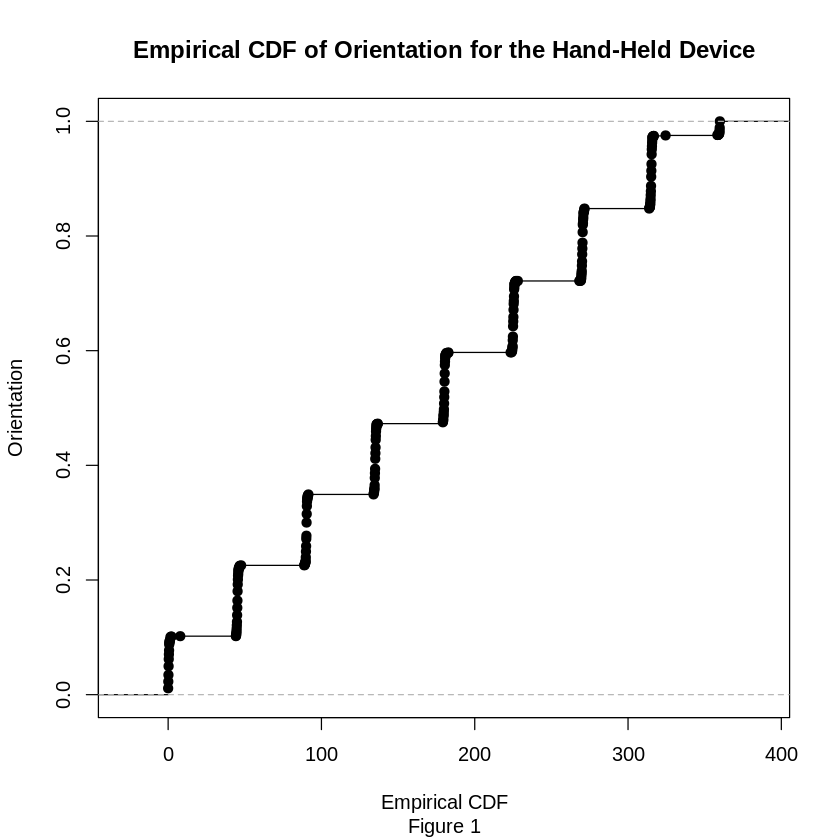

In [70]:
plot(ecdf(offline$orientation), main = 'Empirical CDF of Orientation for the Hand-Held Device', sub = 'Figure 1',
        xlab = 'Empirical CDF', ylab = 'Orientation')

This empiracle distribution function of orientation shows that there are 8 basic orientations that are 45 degrees apart. We see from the steps in the function that these orientations are not exactly 45, 90, 135, ect. Also, the 0 oreintation is split into the two groups, one near 0 and the other near 360. 

In [0]:
roundOrientation = function(angles) {
  refs = seq(0, by = 45, length = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}

Let's create a function that can round off the angles that we are seeing in our function. We created a function that taks the 45 degree angles and rounds them off. 

In [0]:
offline$angle = roundOrientation(offline$orientation)

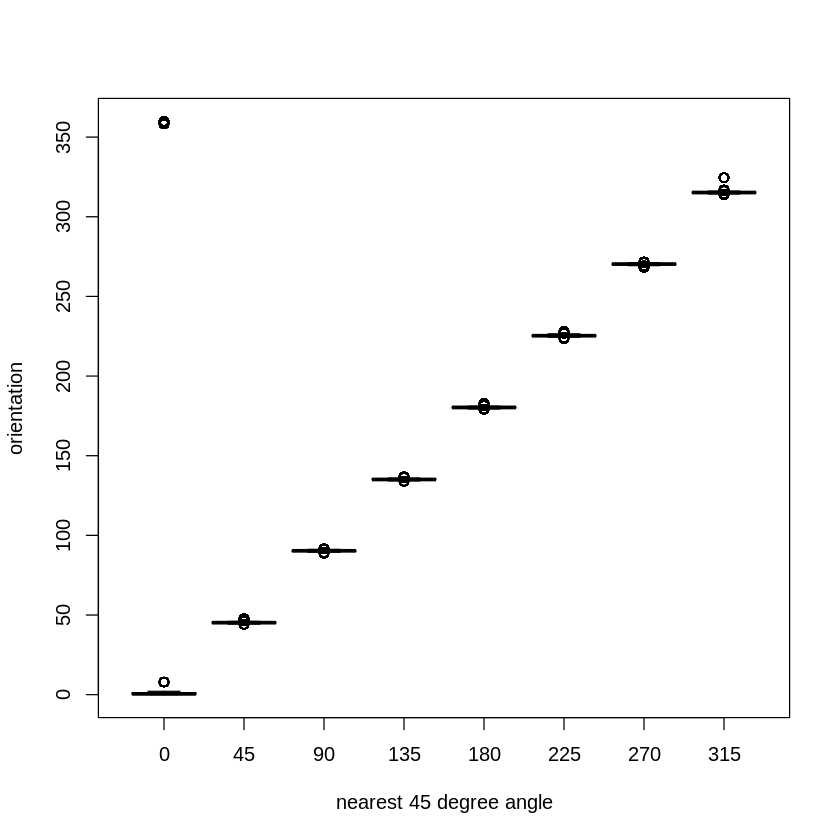

In [73]:
with(offline, boxplot(orientation ~ angle, 
xlab = 'nearest 45 degree angle', 
ylab = 'orientation'))

We can see that the new values look correct and the original values near 360 degrees are mapped to zero. Also, we can see that the slight changes in the location of zero from our map indicate that there is slight variability.

###### Exploring MAC Addresses

from our descriptive summary statistics, it seems like there might be a one-to-one mapping between the MAC address of the access points and channel. To help us ascertain of we do one to one mapping, we look at the relatioship between MAC address and channel. 

In [74]:
c(length(unique(offline$mac)), length(unique(offline$channel)))

[1] 12  8

Here, we can see that there are 12 MAC adderesses and 8 channels. We can get the impression from the building plan  that there are 6 access points. Rereading the documentation, we can see that there are addtiional access points that are not part of the testing area. 

Below we can check the counts of observations for various MAC addresses with table():

In [75]:
table(offline$mac)


00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 

Here, we can see that the first MAC address (00:04:0e:5c:23:fc) and the last two (00:30:bd:f8:7f:c5 & 00:e3:63:82:8b:a9) were not near the testing area or they were only activated for a short period of time. 

Moving forward, let's just focus on the records from the top 7 devices, which we can do with the following code:

In [0]:
subMacs = names(sort(table(offline$mac), decreasing = TRUE))[1:7]
offline = offline[offline$mac %in% subMacs, ]

Next, we can create a table of counts for the remaining MACx channel combinations and confirm if there is one non-zero entry in each row:

In [77]:
macChannel = with(offline, table(mac, channel))
apply(macChannel, 1, function(x) sum(x >0))

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

Since we now see that there is a one-to-one correspondence between MAC and channel for the 7 devices we searched, we can eliminate channel from our offline dataset to further clean or data. 

In [0]:
offline = offline[ , 'channel' != names(offline)]

Looking further into the position of hand held devices using the position variables posX and posY, we can look into how may different locations that are available to indicate where we have data. 

The by() function below can tally up the numbers of rows in each x,y combination. 

In [79]:
locDF = with(offline, by(offline, list(posX, posY), function(x) x))
length(locDF)

[1] 476

476 is longer than the number of actual x, y locations at which the measurements were recorded, many of which were empty. 

In [80]:
sum(sapply(locDF, is.null))

[1] 310

We can drop these unneeded elements as follows.

In [81]:
locDF = locDF[ !sapply(locDF, is.null)]
length(locDF)
locCounts = sapply(locDF, nrow)

[1] 166

below. we can can keep the position information with the location. 

In [0]:
locCounts = sapply(locDF, 
                    function(df)
                        c(df[1, c('posX', 'posY')], count = nrow(df)))

In [83]:
class(locCounts)
dim(locCounts)

[1] "matrix"

[1]   3 166

Let's examine some of the counts.

In [84]:
locCounts[ , 1:8]

posX,0,1,2,0,1,2,0,1
posY,0,0,0,1,1,1,2,2
count,5505,5505,5506,5524,5543,5558,5503,5564


We can see that there are over 5,500 recordings at each position, which aligns with our 8 orientations, 110 replications and 7 access points which should give us 6,160 measurements. 

Lets visualize all 166 counts by adding the counts as texts to their respective locations. To do so, we can transpose the matrix so that the locations are columns of the matrix.

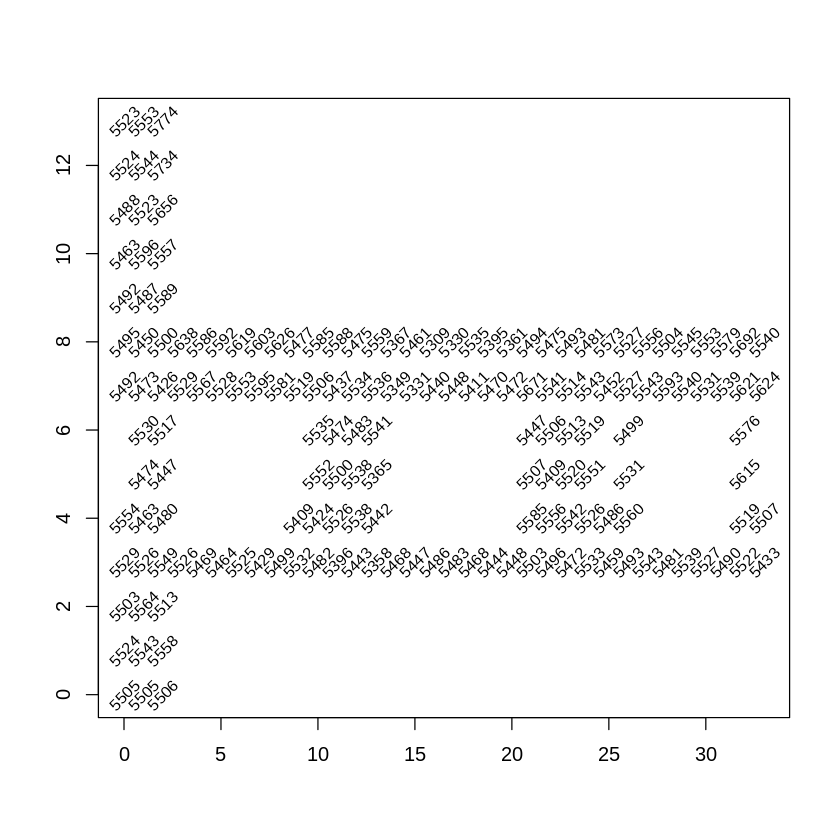

In [85]:
locCounts = t(locCounts)
plot(locCounts, type = 'n', xlab = '', ylab = '')
text(locCounts, labels = locCounts[,3], cex = 0.8, srt = 45)

These are the counts of signals detected at each position. These are plotted at each location in the building  there the number of signals detected from all access points for the offline data. These include 110 signals at 8 angles for each of 6 access points, for a total of 5280 recordings. These can include a 7th Mac address, and doesn't account or all signals, so we have about 5,500 recordingsat each location. 

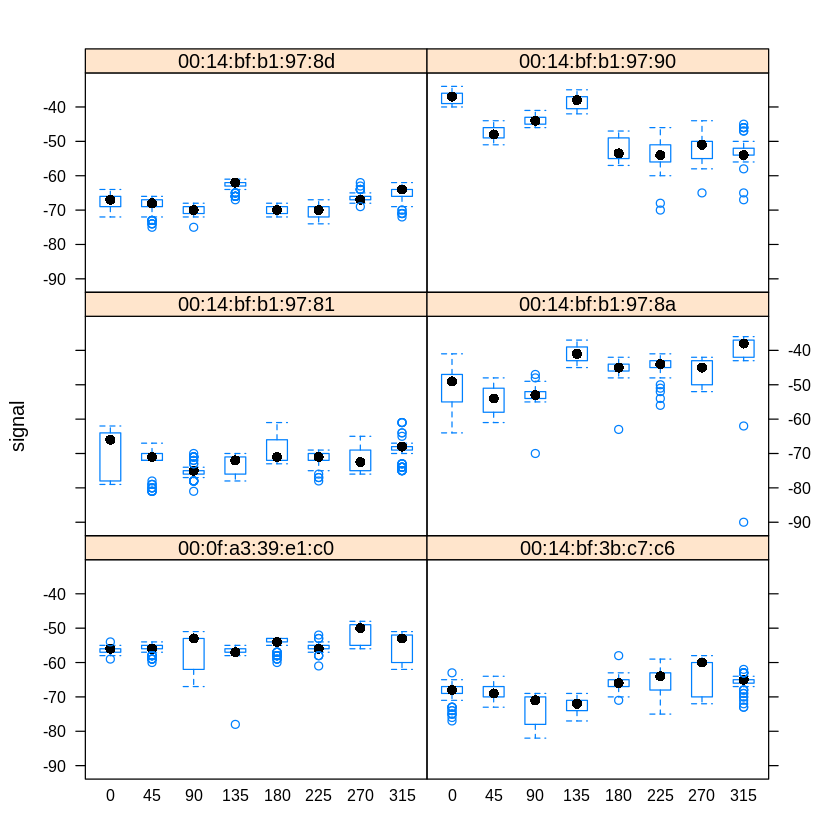

In [95]:
library(lattice)  
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 2 & posY == 12  & mac != "00:0f:a3:39:dd:cd",  layout = c(2,3)) 

In [91]:
with(offline, table(mac, posX, posY))

, , posY = 0

                   posX
mac                   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  00:0f:a3:39:dd:cd 884 893 884   0   0   0   0   0   0   0   0   0   0   0   0
  00:0f:a3:39:e1:c0 884 880 881   0   0   0   0   0   0   0   0   0   0   0   0
  00:14:bf:3b:c7:c6 796 749 802   0   0   0   0   0   0   0   0   0   0   0   0
  00:14:bf:b1:97:81 704 703 686   0   0   0   0   0   0   0   0   0   0   0   0
  00:14:bf:b1:97:8a 777 796 820   0   0   0   0   0   0   0   0   0   0   0   0
  00:14:bf:b1:97:8d 686 693 713   0   0   0   0   0   0   0   0   0   0   0   0
  00:14:bf:b1:97:90 774 791 720   0   0   0   0   0   0   0   0   0   0   0   0
                   posX
mac                  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  00:0f:a3:39:dd:cd   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  00:0f:a3:39:e1:c0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  00:14:bf:3b:c7:c6   0   0   0   0   0   0   0   0   0   

looking specifically at Mac Positions where there are two that appear in the same location, we can find through grouping by position y that there are a couple cases where two Mac ids are in the same x/y position.  These cases are as follows:

- 00:0f:a3:39:dd:cd & 00:0f:a3:39:el:c0 at PosY 3, Pos X 6 as well as posY 7 and posX 15
- 00:14:bf:b1:97:8d & 00:14:bf:b1:97:90 at PosY 3, Pos X 15 as well as Posy 4 and posX 32 

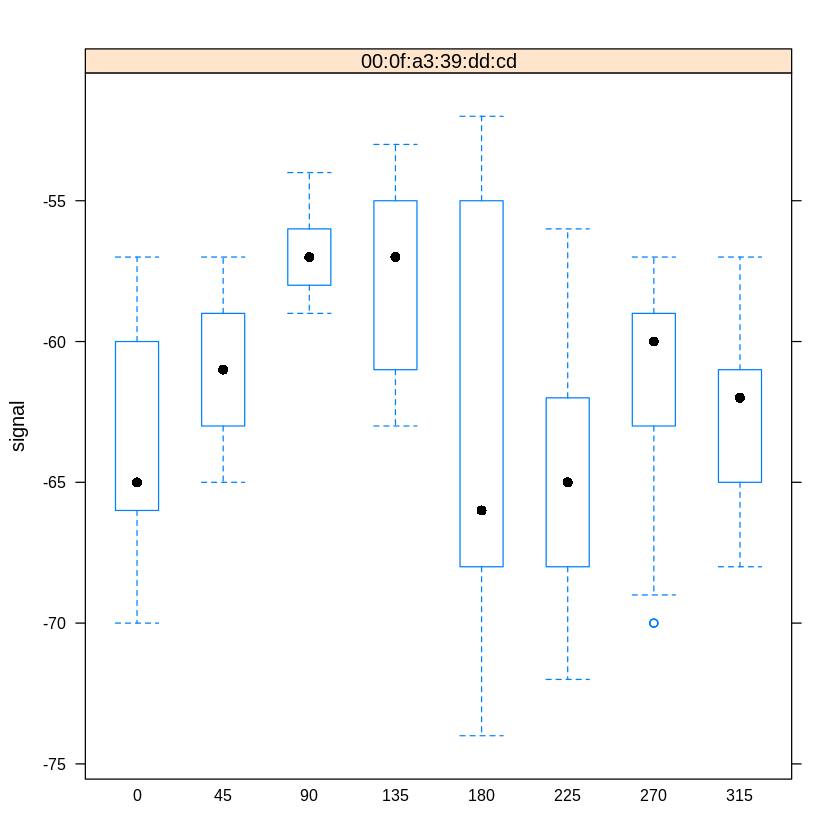

In [98]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 6 & posY == 3  & mac == "00:0f:a3:39:dd:cd") 

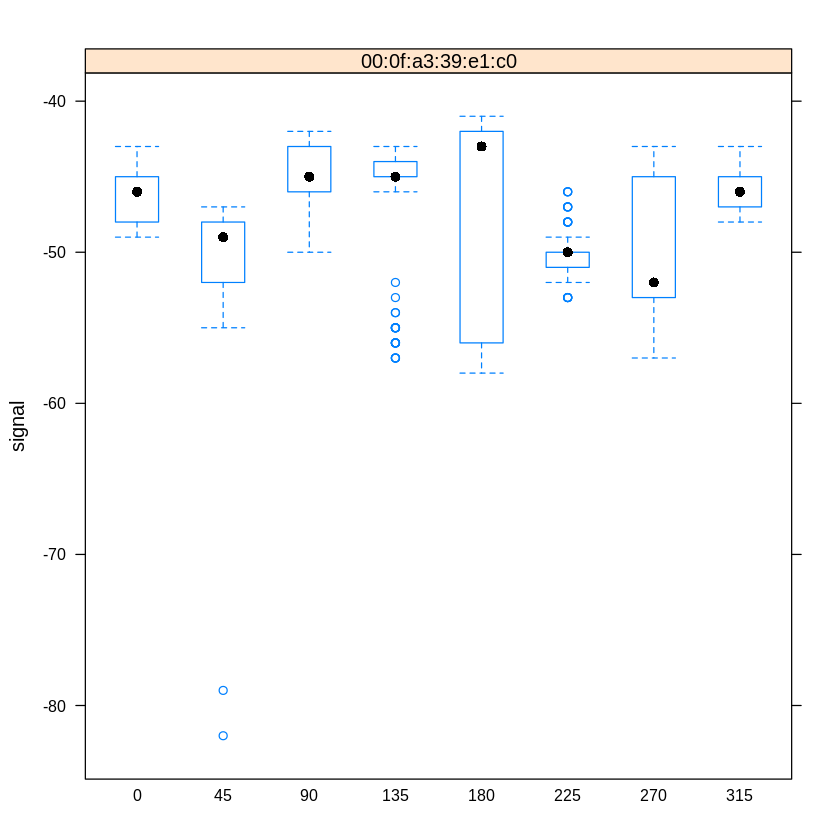

In [101]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 6 & posY == 3  & mac == "00:0f:a3:39:e1:c0") 

Comparing the signal strength of the position X 6 and Position Y 3 location for 00:0f:a3:39:e1:c0 and 00:0f:a3:39:dd:cd. Here we can see the average signal strength is much higher with 00:0f:a3:39:e1:c0 at the same location. 

Next we can test the two addresses at the next shared location:

Pos X 15 and PosY 7

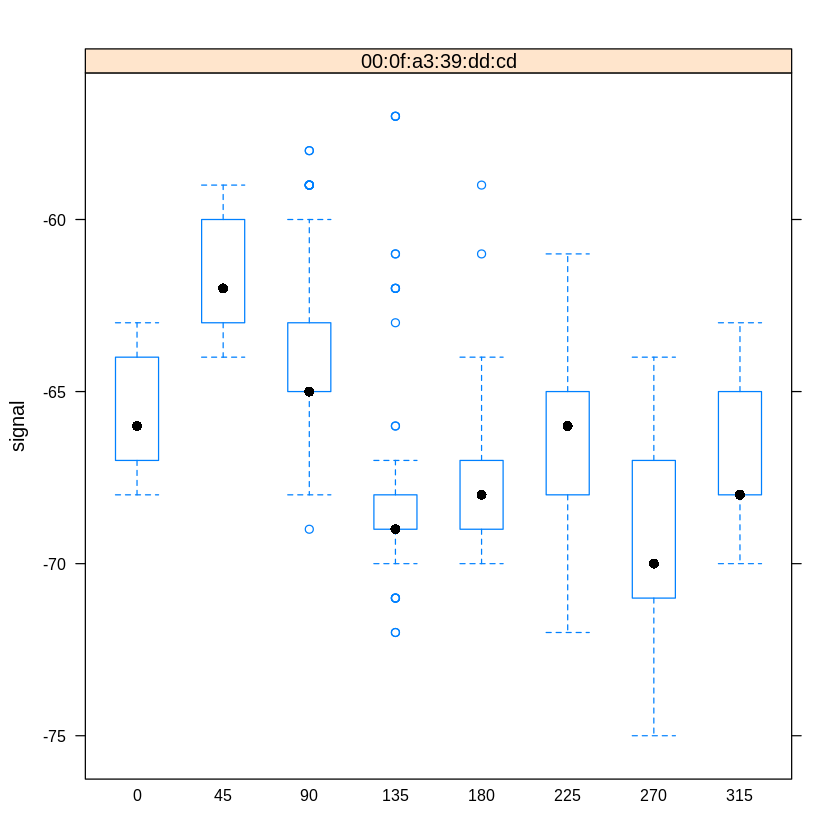

In [104]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 15 & posY == 7  & mac == "00:0f:a3:39:dd:cd") 

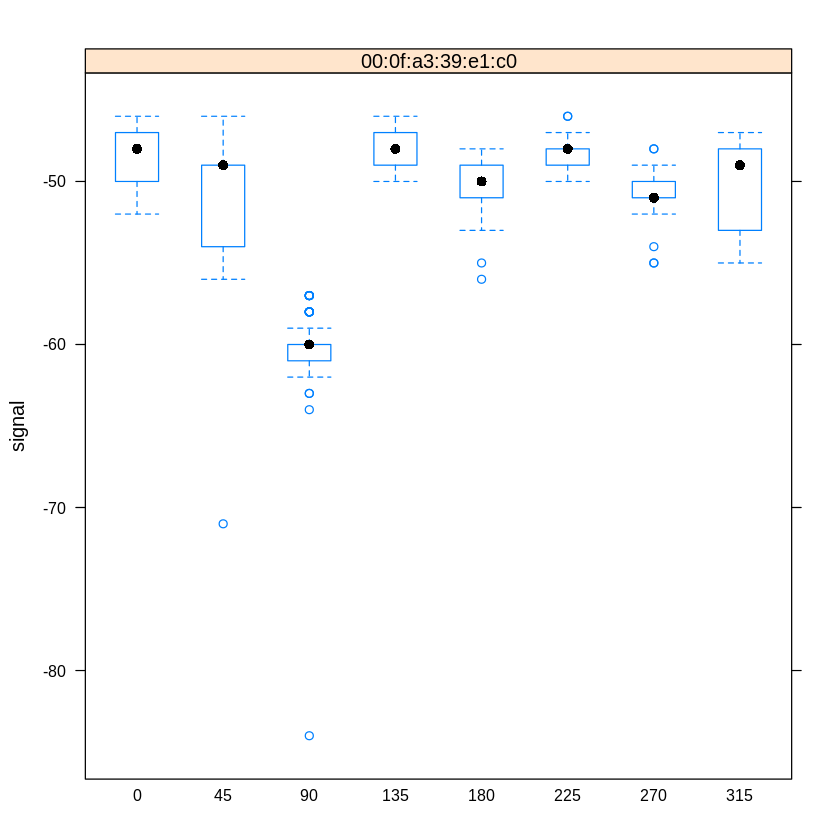

In [103]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 15 & posY == 7  & mac == "00:0f:a3:39:e1:c0") 

Like we saw before, the 00:0f:a3:39:e1:c0 address has a higher signal strength. 

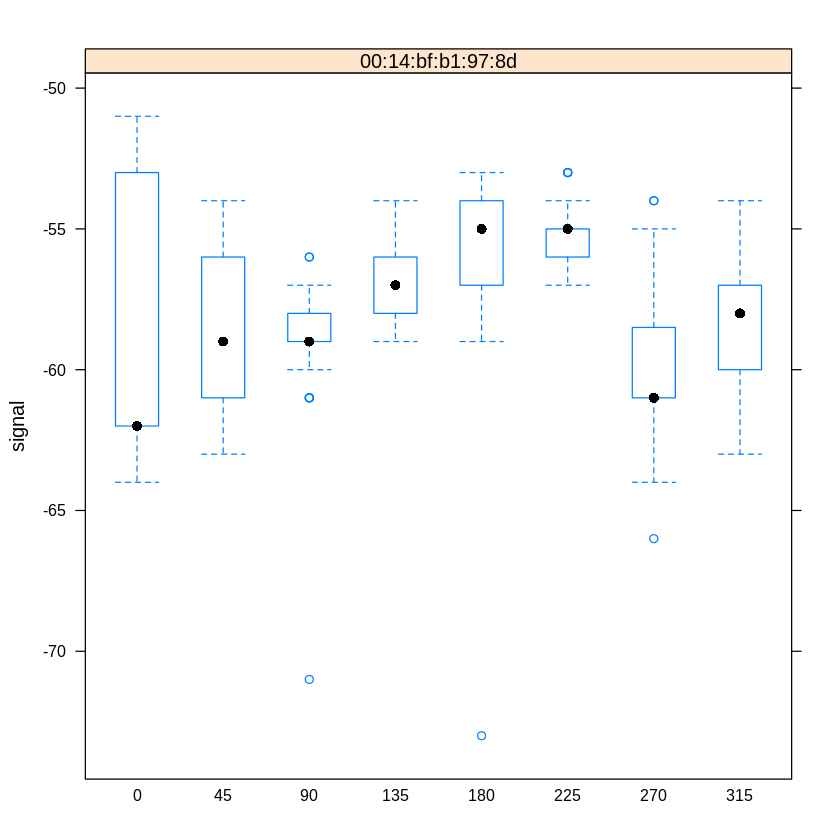

In [105]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 15 & posY == 3  & mac == "00:14:bf:b1:97:8d") 

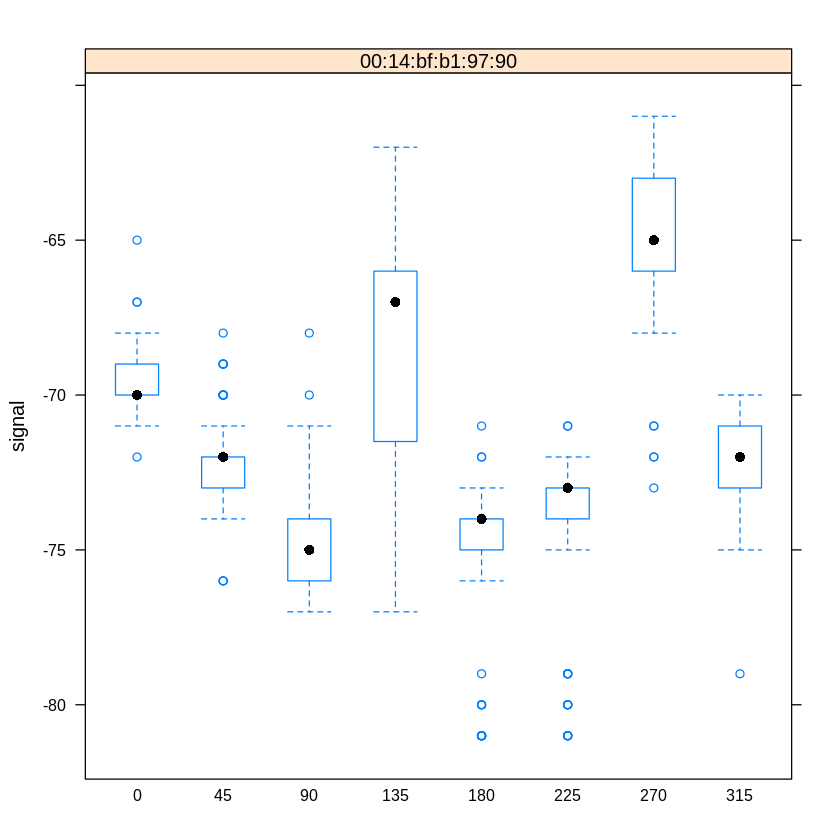

In [107]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 15 & posY == 3  & mac == "00:14:bf:b1:97:90") 

Comparing position X == 15 and position y == 3, the signal strength of 00:14:bf:b1:97:8d is much higher than 00:14:bf:b1:97:90.

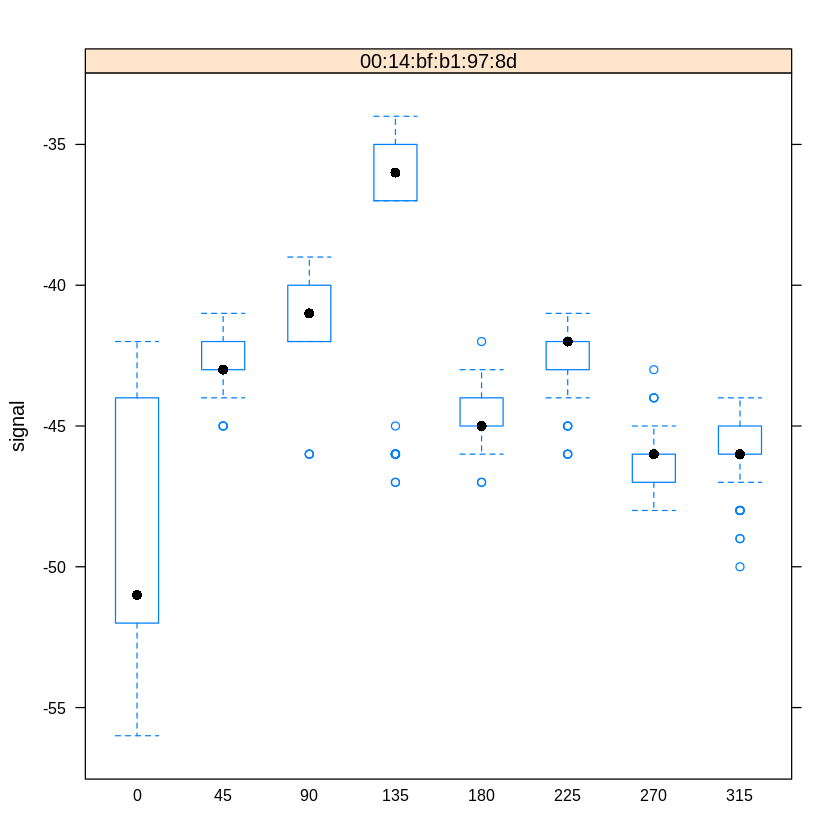

In [108]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 32 & posY == 4  & mac == "00:14:bf:b1:97:8d") 

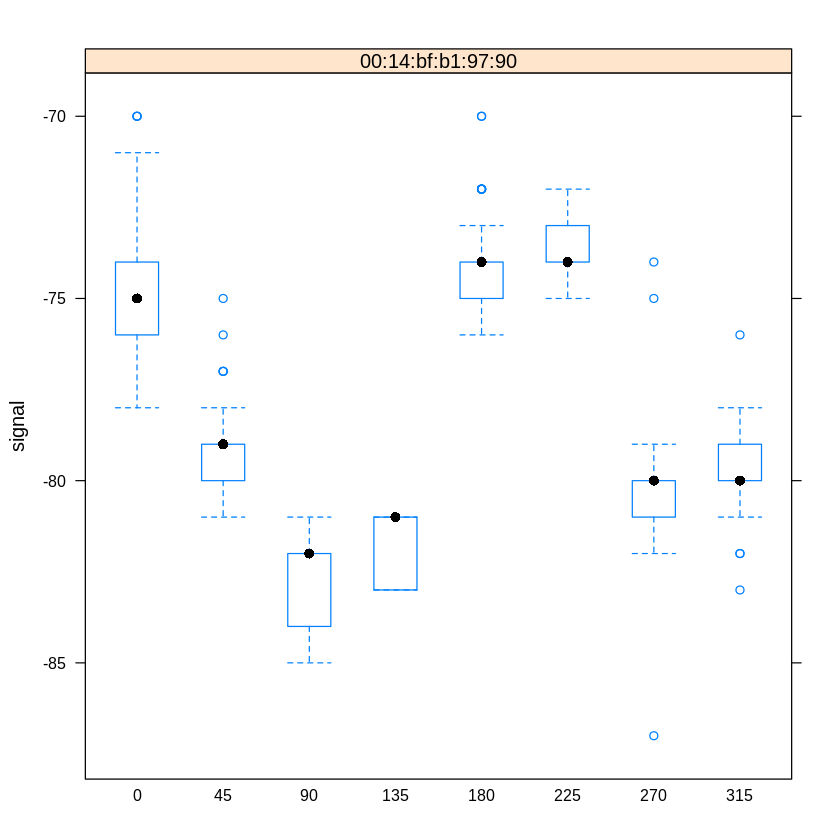

In [109]:
bwplot(signal ~ factor(angle) | mac, data = offline,  subset = posX == 32 & posY == 4  & mac == "00:14:bf:b1:97:90") 

At position X 32 and Position Y 4, we can see that the signal strength of 00:14:bf:b1:97:8d is higher.

In [110]:
summary(offline$signal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -98.00  -67.00  -59.00  -59.92  -53.00  -25.00 

The Small values, such as -98, correspond to weak signals and the large values such as -25, are the strong signals. 

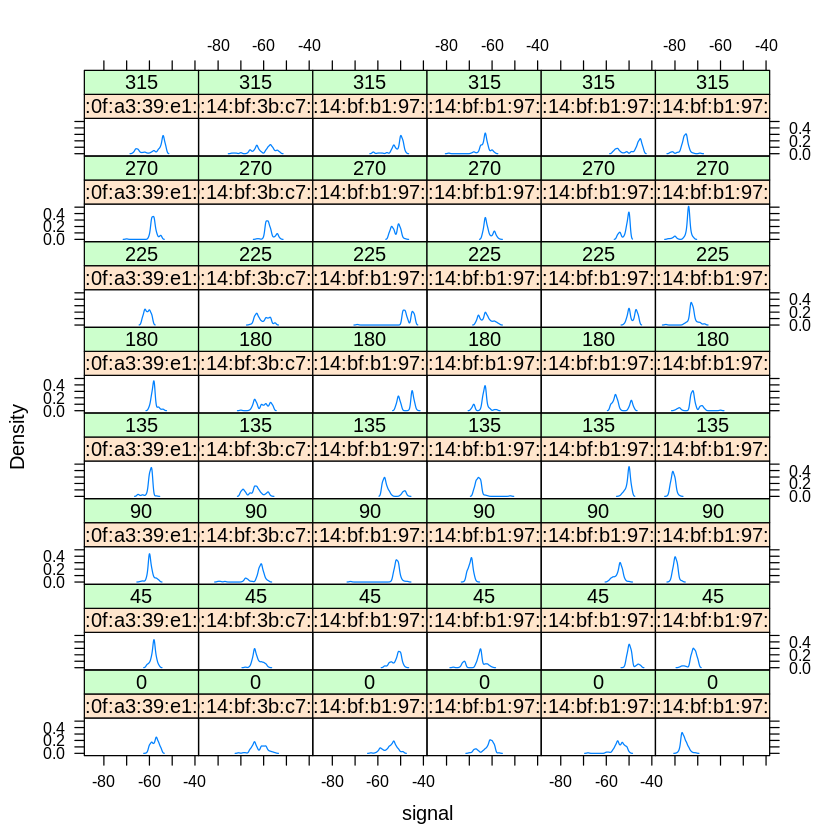

In [112]:
densityplot( ~ signal | mac + factor(angle), data = offline,  subset = posX == 24 & posY == 4 &  mac != "00:0f:a3:39:dd:cd",  bw = 0.5, plot.points = FALSE) 